#**Image Classification**
###Comparison of Manhattan (L1) and Euclidean (L2) Distances

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import necessary Libraries:**



In [3]:
import os
import math
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt
import random
import numpy as np
from IPython import display

Set Data Directory

In [4]:
DATA_DIR="/content/drive/MyDrive/input/animal-image-datasetdog-cat-and-panda/animals/animals"

Load Catagories

In [5]:
def load_image(DATA_DIR):
  catagories=os.listdir(DATA_DIR)
  return catagories

Train Data Creation Function

In [6]:
def get_trained_data(catagories,data_dir):
  trained_data=[]
  for c in catagories:
    new_path=os.path.join(data_dir,c)
    for img in tqdm(os.listdir(new_path)):
        label=catagories.index(c)
        img_path=os.path.join(new_path,img)
        try:
          img_arr=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
          img_arr=cv2.resize(img_arr,(32,32))
        except:
          pass

        trained_data.append([img_arr,label])

  random.shuffle(trained_data)
  return trained_data

Calculate Distance

In [7]:
def distance(train,valid):

    return abs(train-valid)

KNN classifier Function

In [8]:
def KNN(validation_set,trained_set,k=5,L=1):
  dist=[]
  zindex=0
  for v in tqdm(validation_set):

      for t in trained_set:
        if L==1:
          z=distance(t[0],v[0])
          d= np.sum(z)

        elif L == 2:
          z=distance(t[0],v[0])
          d=np.sqrt(int(np.power(np.sum(distance(t[0],v[0])),2)))


        labell=t[1]
        dist.append([d,labell,v[1],v[0]])
      zindex +=1
  dist.sort(key=lambda x: x[0])
  return dist[:k]

K-FOLD cross validation

In [9]:
def KFOLD(trained_set,kf=3,k_nei=3,L=1):
  point_dict={k_nei:[]}
  for i in range(kf):
    accuracy=0
    test=trained_set[i*(int(len(trained_set)/kf)):(i+1)*int(len(trained_set)/kf)]
    first=trained_set[0:i*int(len(trained_set)/kf)]
    last=trained_set[(i+1)*int(len(trained_set)/kf):]
    trained=first+last
    pred=KNN(test,trained,k_nei,L)
    print("-"*20)
    print("FOLD-",i+1)

    for p in pred:
      print(p[:3])
      if(p[2] == p[1]):
        accuracy +=1
    final_acc=accuracy/k_nei
    point_dict[k_nei].append(final_acc)
    print("Accuracy: ",final_acc*100,"%")

    print("-"*20)
  return point_dict








For showing Image from numpy image matrix

In [10]:
def show_image(img_matrix,title):
  plt.figure()
  plt.title(title)
  plt.imshow(img_matrix)
  plt.show()


Create Catagories & Generate Train Data

In [11]:
catag=load_image(DATA_DIR)
trained_data=get_trained_data(catag,DATA_DIR)


100%|██████████| 1000/1000 [00:32<00:00, 30.52it/s]


In [12]:
random.shuffle(trained_data)

For Each value of k of knn. And get point every K-Fold=5

In [13]:

K_nei=[3, 5, 9, 13, 15, 20,25]
points=[]
for i in K_nei:

  print("-"*10,f"for Neigbour={i}","-"*10)
  point=KFOLD(trained_data,kf=5,k_nei=i,L=1)
  points.append(point)
  print("-"*7)




print(points)

---------- for Neigbour=3 ----------


100%|██████████| 600/600 [00:14<00:00, 40.10it/s]


--------------------
FOLD- 1
[np.uint64(54202), 1, 2]
[np.uint64(55161), 2, 2]
[np.uint64(56257), 0, 2]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 40.39it/s]


--------------------
FOLD- 2
[np.uint64(58374), 1, 2]
[np.uint64(59036), 2, 2]
[np.uint64(60324), 1, 2]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 40.19it/s]


--------------------
FOLD- 3
[np.uint64(42569), 1, 2]
[np.uint64(44548), 0, 2]
[np.uint64(45182), 0, 2]
Accuracy:  0.0 %
--------------------


100%|██████████| 600/600 [00:17<00:00, 33.76it/s]


--------------------
FOLD- 4
[np.uint64(49989), 2, 1]
[np.uint64(51929), 1, 1]
[np.uint64(55535), 2, 1]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 42.07it/s]


--------------------
FOLD- 5
[np.uint64(57522), 1, 2]
[np.uint64(58490), 1, 2]
[np.uint64(59133), 2, 2]
Accuracy:  33.33333333333333 %
--------------------
-------
---------- for Neigbour=5 ----------


100%|██████████| 600/600 [00:14<00:00, 42.80it/s]


--------------------
FOLD- 1
[np.uint64(54202), 1, 2]
[np.uint64(55161), 2, 2]
[np.uint64(56257), 0, 2]
[np.uint64(57327), 0, 2]
[np.uint64(58125), 1, 2]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 39.65it/s]


--------------------
FOLD- 2
[np.uint64(58374), 1, 2]
[np.uint64(59036), 2, 2]
[np.uint64(60324), 1, 2]
[np.uint64(60345), 1, 2]
[np.uint64(60490), 2, 2]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 37.82it/s]


--------------------
FOLD- 3
[np.uint64(42569), 1, 2]
[np.uint64(44548), 0, 2]
[np.uint64(45182), 0, 2]
[np.uint64(46600), 2, 2]
[np.uint64(46672), 0, 2]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 42.17it/s]


--------------------
FOLD- 4
[np.uint64(49989), 2, 1]
[np.uint64(51929), 1, 1]
[np.uint64(55535), 2, 1]
[np.uint64(58582), 2, 1]
[np.uint64(58913), 2, 1]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 41.84it/s]


--------------------
FOLD- 5
[np.uint64(57522), 1, 2]
[np.uint64(58490), 1, 2]
[np.uint64(59133), 2, 2]
[np.uint64(59933), 2, 2]
[np.uint64(59971), 2, 2]
Accuracy:  60.0 %
--------------------
-------
---------- for Neigbour=9 ----------


100%|██████████| 600/600 [00:14<00:00, 42.84it/s]


--------------------
FOLD- 1
[np.uint64(54202), 1, 2]
[np.uint64(55161), 2, 2]
[np.uint64(56257), 0, 2]
[np.uint64(57327), 0, 2]
[np.uint64(58125), 1, 2]
[np.uint64(59253), 0, 2]
[np.uint64(60856), 1, 1]
[np.uint64(61403), 2, 2]
[np.uint64(61732), 2, 2]
Accuracy:  44.44444444444444 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 41.89it/s]


--------------------
FOLD- 2
[np.uint64(58374), 1, 2]
[np.uint64(59036), 2, 2]
[np.uint64(60324), 1, 2]
[np.uint64(60345), 1, 2]
[np.uint64(60490), 2, 2]
[np.uint64(61041), 1, 2]
[np.uint64(61344), 2, 1]
[np.uint64(61674), 1, 2]
[np.uint64(63654), 0, 2]
Accuracy:  22.22222222222222 %
--------------------


100%|██████████| 600/600 [00:13<00:00, 43.21it/s]


--------------------
FOLD- 3
[np.uint64(42569), 1, 2]
[np.uint64(44548), 0, 2]
[np.uint64(45182), 0, 2]
[np.uint64(46600), 2, 2]
[np.uint64(46672), 0, 2]
[np.uint64(48476), 2, 1]
[np.uint64(49052), 1, 2]
[np.uint64(49861), 1, 2]
[np.uint64(51775), 0, 2]
Accuracy:  11.11111111111111 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 41.83it/s]


--------------------
FOLD- 4
[np.uint64(49989), 2, 1]
[np.uint64(51929), 1, 1]
[np.uint64(55535), 2, 1]
[np.uint64(58582), 2, 1]
[np.uint64(58913), 2, 1]
[np.uint64(59814), 1, 2]
[np.uint64(60001), 1, 2]
[np.uint64(60002), 1, 1]
[np.uint64(60333), 2, 2]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 42.84it/s]


--------------------
FOLD- 5
[np.uint64(57522), 1, 2]
[np.uint64(58490), 1, 2]
[np.uint64(59133), 2, 2]
[np.uint64(59933), 2, 2]
[np.uint64(59971), 2, 2]
[np.uint64(59991), 1, 2]
[np.uint64(60266), 2, 1]
[np.uint64(60404), 1, 2]
[np.uint64(60406), 2, 2]
Accuracy:  44.44444444444444 %
--------------------
-------
---------- for Neigbour=13 ----------


100%|██████████| 600/600 [00:14<00:00, 41.45it/s]


--------------------
FOLD- 1
[np.uint64(54202), 1, 2]
[np.uint64(55161), 2, 2]
[np.uint64(56257), 0, 2]
[np.uint64(57327), 0, 2]
[np.uint64(58125), 1, 2]
[np.uint64(59253), 0, 2]
[np.uint64(60856), 1, 1]
[np.uint64(61403), 2, 2]
[np.uint64(61732), 2, 2]
[np.uint64(61844), 1, 2]
[np.uint64(62213), 2, 2]
[np.uint64(62384), 0, 2]
[np.uint64(62518), 1, 2]
Accuracy:  38.46153846153847 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 42.71it/s]


--------------------
FOLD- 2
[np.uint64(58374), 1, 2]
[np.uint64(59036), 2, 2]
[np.uint64(60324), 1, 2]
[np.uint64(60345), 1, 2]
[np.uint64(60490), 2, 2]
[np.uint64(61041), 1, 2]
[np.uint64(61344), 2, 1]
[np.uint64(61674), 1, 2]
[np.uint64(63654), 0, 2]
[np.uint64(63677), 1, 2]
[np.uint64(64114), 0, 2]
[np.uint64(64117), 2, 2]
[np.uint64(64653), 0, 2]
Accuracy:  23.076923076923077 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 41.63it/s]


--------------------
FOLD- 3
[np.uint64(42569), 1, 2]
[np.uint64(44548), 0, 2]
[np.uint64(45182), 0, 2]
[np.uint64(46600), 2, 2]
[np.uint64(46672), 0, 2]
[np.uint64(48476), 2, 1]
[np.uint64(49052), 1, 2]
[np.uint64(49861), 1, 2]
[np.uint64(51775), 0, 2]
[np.uint64(52330), 2, 2]
[np.uint64(57771), 1, 1]
[np.uint64(58173), 0, 2]
[np.uint64(58249), 1, 2]
Accuracy:  23.076923076923077 %
--------------------


100%|██████████| 600/600 [00:13<00:00, 43.00it/s]


--------------------
FOLD- 4
[np.uint64(49989), 2, 1]
[np.uint64(51929), 1, 1]
[np.uint64(55535), 2, 1]
[np.uint64(58582), 2, 1]
[np.uint64(58913), 2, 1]
[np.uint64(59814), 1, 2]
[np.uint64(60001), 1, 2]
[np.uint64(60002), 1, 1]
[np.uint64(60333), 2, 2]
[np.uint64(60470), 1, 2]
[np.uint64(61293), 2, 1]
[np.uint64(61482), 1, 1]
[np.uint64(61533), 1, 1]
Accuracy:  38.46153846153847 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 41.68it/s]


--------------------
FOLD- 5
[np.uint64(57522), 1, 2]
[np.uint64(58490), 1, 2]
[np.uint64(59133), 2, 2]
[np.uint64(59933), 2, 2]
[np.uint64(59971), 2, 2]
[np.uint64(59991), 1, 2]
[np.uint64(60266), 2, 1]
[np.uint64(60404), 1, 2]
[np.uint64(60406), 2, 2]
[np.uint64(60931), 2, 1]
[np.uint64(60976), 0, 1]
[np.uint64(61041), 2, 1]
[np.uint64(61725), 2, 1]
Accuracy:  30.76923076923077 %
--------------------
-------
---------- for Neigbour=15 ----------


100%|██████████| 600/600 [00:17<00:00, 34.28it/s]


--------------------
FOLD- 1
[np.uint64(54202), 1, 2]
[np.uint64(55161), 2, 2]
[np.uint64(56257), 0, 2]
[np.uint64(57327), 0, 2]
[np.uint64(58125), 1, 2]
[np.uint64(59253), 0, 2]
[np.uint64(60856), 1, 1]
[np.uint64(61403), 2, 2]
[np.uint64(61732), 2, 2]
[np.uint64(61844), 1, 2]
[np.uint64(62213), 2, 2]
[np.uint64(62384), 0, 2]
[np.uint64(62518), 1, 2]
[np.uint64(63178), 2, 1]
[np.uint64(63403), 2, 1]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 41.01it/s]


--------------------
FOLD- 2
[np.uint64(58374), 1, 2]
[np.uint64(59036), 2, 2]
[np.uint64(60324), 1, 2]
[np.uint64(60345), 1, 2]
[np.uint64(60490), 2, 2]
[np.uint64(61041), 1, 2]
[np.uint64(61344), 2, 1]
[np.uint64(61674), 1, 2]
[np.uint64(63654), 0, 2]
[np.uint64(63677), 1, 2]
[np.uint64(64114), 0, 2]
[np.uint64(64117), 2, 2]
[np.uint64(64653), 0, 2]
[np.uint64(64700), 2, 1]
[np.uint64(64835), 1, 1]
Accuracy:  26.666666666666668 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 42.52it/s]


--------------------
FOLD- 3
[np.uint64(42569), 1, 2]
[np.uint64(44548), 0, 2]
[np.uint64(45182), 0, 2]
[np.uint64(46600), 2, 2]
[np.uint64(46672), 0, 2]
[np.uint64(48476), 2, 1]
[np.uint64(49052), 1, 2]
[np.uint64(49861), 1, 2]
[np.uint64(51775), 0, 2]
[np.uint64(52330), 2, 2]
[np.uint64(57771), 1, 1]
[np.uint64(58173), 0, 2]
[np.uint64(58249), 1, 2]
[np.uint64(58718), 1, 2]
[np.uint64(58948), 0, 2]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 41.26it/s]


--------------------
FOLD- 4
[np.uint64(49989), 2, 1]
[np.uint64(51929), 1, 1]
[np.uint64(55535), 2, 1]
[np.uint64(58582), 2, 1]
[np.uint64(58913), 2, 1]
[np.uint64(59814), 1, 2]
[np.uint64(60001), 1, 2]
[np.uint64(60002), 1, 1]
[np.uint64(60333), 2, 2]
[np.uint64(60470), 1, 2]
[np.uint64(61293), 2, 1]
[np.uint64(61482), 1, 1]
[np.uint64(61533), 1, 1]
[np.uint64(61543), 2, 1]
[np.uint64(62088), 2, 2]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 42.43it/s]


--------------------
FOLD- 5
[np.uint64(57522), 1, 2]
[np.uint64(58490), 1, 2]
[np.uint64(59133), 2, 2]
[np.uint64(59933), 2, 2]
[np.uint64(59971), 2, 2]
[np.uint64(59991), 1, 2]
[np.uint64(60266), 2, 1]
[np.uint64(60404), 1, 2]
[np.uint64(60406), 2, 2]
[np.uint64(60931), 2, 1]
[np.uint64(60976), 0, 1]
[np.uint64(61041), 2, 1]
[np.uint64(61725), 2, 1]
[np.uint64(62124), 0, 1]
[np.uint64(62481), 1, 1]
Accuracy:  33.33333333333333 %
--------------------
-------
---------- for Neigbour=20 ----------


100%|██████████| 600/600 [00:14<00:00, 42.74it/s]


--------------------
FOLD- 1
[np.uint64(54202), 1, 2]
[np.uint64(55161), 2, 2]
[np.uint64(56257), 0, 2]
[np.uint64(57327), 0, 2]
[np.uint64(58125), 1, 2]
[np.uint64(59253), 0, 2]
[np.uint64(60856), 1, 1]
[np.uint64(61403), 2, 2]
[np.uint64(61732), 2, 2]
[np.uint64(61844), 1, 2]
[np.uint64(62213), 2, 2]
[np.uint64(62384), 0, 2]
[np.uint64(62518), 1, 2]
[np.uint64(63178), 2, 1]
[np.uint64(63403), 2, 1]
[np.uint64(64206), 1, 2]
[np.uint64(64405), 1, 1]
[np.uint64(64663), 2, 2]
[np.uint64(65017), 2, 2]
[np.uint64(65226), 1, 0]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:13<00:00, 43.45it/s]


--------------------
FOLD- 2
[np.uint64(58374), 1, 2]
[np.uint64(59036), 2, 2]
[np.uint64(60324), 1, 2]
[np.uint64(60345), 1, 2]
[np.uint64(60490), 2, 2]
[np.uint64(61041), 1, 2]
[np.uint64(61344), 2, 1]
[np.uint64(61674), 1, 2]
[np.uint64(63654), 0, 2]
[np.uint64(63677), 1, 2]
[np.uint64(64114), 0, 2]
[np.uint64(64117), 2, 2]
[np.uint64(64653), 0, 2]
[np.uint64(64700), 2, 1]
[np.uint64(64835), 1, 1]
[np.uint64(64889), 1, 2]
[np.uint64(64930), 2, 2]
[np.uint64(64982), 1, 1]
[np.uint64(65141), 2, 1]
[np.uint64(65387), 1, 2]
Accuracy:  30.0 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 42.55it/s]


--------------------
FOLD- 3
[np.uint64(42569), 1, 2]
[np.uint64(44548), 0, 2]
[np.uint64(45182), 0, 2]
[np.uint64(46600), 2, 2]
[np.uint64(46672), 0, 2]
[np.uint64(48476), 2, 1]
[np.uint64(49052), 1, 2]
[np.uint64(49861), 1, 2]
[np.uint64(51775), 0, 2]
[np.uint64(52330), 2, 2]
[np.uint64(57771), 1, 1]
[np.uint64(58173), 0, 2]
[np.uint64(58249), 1, 2]
[np.uint64(58718), 1, 2]
[np.uint64(58948), 0, 2]
[np.uint64(58950), 2, 2]
[np.uint64(58966), 1, 2]
[np.uint64(59191), 1, 1]
[np.uint64(59245), 0, 2]
[np.uint64(59424), 1, 1]
Accuracy:  30.0 %
--------------------


100%|██████████| 600/600 [00:13<00:00, 42.88it/s]


--------------------
FOLD- 4
[np.uint64(49989), 2, 1]
[np.uint64(51929), 1, 1]
[np.uint64(55535), 2, 1]
[np.uint64(58582), 2, 1]
[np.uint64(58913), 2, 1]
[np.uint64(59814), 1, 2]
[np.uint64(60001), 1, 2]
[np.uint64(60002), 1, 1]
[np.uint64(60333), 2, 2]
[np.uint64(60470), 1, 2]
[np.uint64(61293), 2, 1]
[np.uint64(61482), 1, 1]
[np.uint64(61533), 1, 1]
[np.uint64(61543), 2, 1]
[np.uint64(62088), 2, 2]
[np.uint64(62594), 2, 2]
[np.uint64(62763), 2, 1]
[np.uint64(62812), 0, 1]
[np.uint64(62921), 2, 1]
[np.uint64(63139), 1, 1]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 42.14it/s]


--------------------
FOLD- 5
[np.uint64(57522), 1, 2]
[np.uint64(58490), 1, 2]
[np.uint64(59133), 2, 2]
[np.uint64(59933), 2, 2]
[np.uint64(59971), 2, 2]
[np.uint64(59991), 1, 2]
[np.uint64(60266), 2, 1]
[np.uint64(60404), 1, 2]
[np.uint64(60406), 2, 2]
[np.uint64(60931), 2, 1]
[np.uint64(60976), 0, 1]
[np.uint64(61041), 2, 1]
[np.uint64(61725), 2, 1]
[np.uint64(62124), 0, 1]
[np.uint64(62481), 1, 1]
[np.uint64(62602), 1, 1]
[np.uint64(62762), 1, 1]
[np.uint64(63005), 2, 1]
[np.uint64(63295), 2, 0]
[np.uint64(64344), 1, 2]
Accuracy:  35.0 %
--------------------
-------
---------- for Neigbour=25 ----------


100%|██████████| 600/600 [00:13<00:00, 42.98it/s]


--------------------
FOLD- 1
[np.uint64(54202), 1, 2]
[np.uint64(55161), 2, 2]
[np.uint64(56257), 0, 2]
[np.uint64(57327), 0, 2]
[np.uint64(58125), 1, 2]
[np.uint64(59253), 0, 2]
[np.uint64(60856), 1, 1]
[np.uint64(61403), 2, 2]
[np.uint64(61732), 2, 2]
[np.uint64(61844), 1, 2]
[np.uint64(62213), 2, 2]
[np.uint64(62384), 0, 2]
[np.uint64(62518), 1, 2]
[np.uint64(63178), 2, 1]
[np.uint64(63403), 2, 1]
[np.uint64(64206), 1, 2]
[np.uint64(64405), 1, 1]
[np.uint64(64663), 2, 2]
[np.uint64(65017), 2, 2]
[np.uint64(65226), 1, 0]
[np.uint64(65234), 0, 2]
[np.uint64(65494), 2, 1]
[np.uint64(65589), 2, 1]
[np.uint64(65621), 2, 1]
[np.uint64(65701), 2, 1]
Accuracy:  32.0 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 42.51it/s]


--------------------
FOLD- 2
[np.uint64(58374), 1, 2]
[np.uint64(59036), 2, 2]
[np.uint64(60324), 1, 2]
[np.uint64(60345), 1, 2]
[np.uint64(60490), 2, 2]
[np.uint64(61041), 1, 2]
[np.uint64(61344), 2, 1]
[np.uint64(61674), 1, 2]
[np.uint64(63654), 0, 2]
[np.uint64(63677), 1, 2]
[np.uint64(64114), 0, 2]
[np.uint64(64117), 2, 2]
[np.uint64(64653), 0, 2]
[np.uint64(64700), 2, 1]
[np.uint64(64835), 1, 1]
[np.uint64(64889), 1, 2]
[np.uint64(64930), 2, 2]
[np.uint64(64982), 1, 1]
[np.uint64(65141), 2, 1]
[np.uint64(65387), 1, 2]
[np.uint64(65573), 1, 2]
[np.uint64(65694), 0, 2]
[np.uint64(65811), 1, 2]
[np.uint64(65970), 2, 2]
[np.uint64(66711), 1, 2]
Accuracy:  28.000000000000004 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 41.91it/s]


--------------------
FOLD- 3
[np.uint64(42569), 1, 2]
[np.uint64(44548), 0, 2]
[np.uint64(45182), 0, 2]
[np.uint64(46600), 2, 2]
[np.uint64(46672), 0, 2]
[np.uint64(48476), 2, 1]
[np.uint64(49052), 1, 2]
[np.uint64(49861), 1, 2]
[np.uint64(51775), 0, 2]
[np.uint64(52330), 2, 2]
[np.uint64(57771), 1, 1]
[np.uint64(58173), 0, 2]
[np.uint64(58249), 1, 2]
[np.uint64(58718), 1, 2]
[np.uint64(58948), 0, 2]
[np.uint64(58950), 2, 2]
[np.uint64(58966), 1, 2]
[np.uint64(59191), 1, 1]
[np.uint64(59245), 0, 2]
[np.uint64(59424), 1, 1]
[np.uint64(59672), 2, 2]
[np.uint64(59820), 2, 2]
[np.uint64(60325), 1, 2]
[np.uint64(60829), 1, 2]
[np.uint64(60968), 2, 2]
Accuracy:  36.0 %
--------------------


100%|██████████| 600/600 [00:13<00:00, 42.87it/s]


--------------------
FOLD- 4
[np.uint64(49989), 2, 1]
[np.uint64(51929), 1, 1]
[np.uint64(55535), 2, 1]
[np.uint64(58582), 2, 1]
[np.uint64(58913), 2, 1]
[np.uint64(59814), 1, 2]
[np.uint64(60001), 1, 2]
[np.uint64(60002), 1, 1]
[np.uint64(60333), 2, 2]
[np.uint64(60470), 1, 2]
[np.uint64(61293), 2, 1]
[np.uint64(61482), 1, 1]
[np.uint64(61533), 1, 1]
[np.uint64(61543), 2, 1]
[np.uint64(62088), 2, 2]
[np.uint64(62594), 2, 2]
[np.uint64(62763), 2, 1]
[np.uint64(62812), 0, 1]
[np.uint64(62921), 2, 1]
[np.uint64(63139), 1, 1]
[np.uint64(63231), 0, 1]
[np.uint64(63426), 2, 2]
[np.uint64(63638), 1, 2]
[np.uint64(63852), 1, 2]
[np.uint64(64148), 2, 2]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:13<00:00, 42.99it/s]


--------------------
FOLD- 5
[np.uint64(57522), 1, 2]
[np.uint64(58490), 1, 2]
[np.uint64(59133), 2, 2]
[np.uint64(59933), 2, 2]
[np.uint64(59971), 2, 2]
[np.uint64(59991), 1, 2]
[np.uint64(60266), 2, 1]
[np.uint64(60404), 1, 2]
[np.uint64(60406), 2, 2]
[np.uint64(60931), 2, 1]
[np.uint64(60976), 0, 1]
[np.uint64(61041), 2, 1]
[np.uint64(61725), 2, 1]
[np.uint64(62124), 0, 1]
[np.uint64(62481), 1, 1]
[np.uint64(62602), 1, 1]
[np.uint64(62762), 1, 1]
[np.uint64(63005), 2, 1]
[np.uint64(63295), 2, 0]
[np.uint64(64344), 1, 2]
[np.uint64(64488), 2, 0]
[np.uint64(64619), 2, 2]
[np.uint64(64825), 2, 1]
[np.uint64(64973), 2, 2]
[np.uint64(65235), 2, 2]
Accuracy:  40.0 %
--------------------
-------
[{3: [0.3333333333333333, 0.3333333333333333, 0.0, 0.3333333333333333, 0.3333333333333333]}, {5: [0.2, 0.4, 0.2, 0.2, 0.6]}, {9: [0.4444444444444444, 0.2222222222222222, 0.1111111111111111, 0.3333333333333333, 0.4444444444444444]}, {13: [0.38461538461538464, 0.23076923076923078, 0.23076923076923078

Plotting values of points for L1 Distance



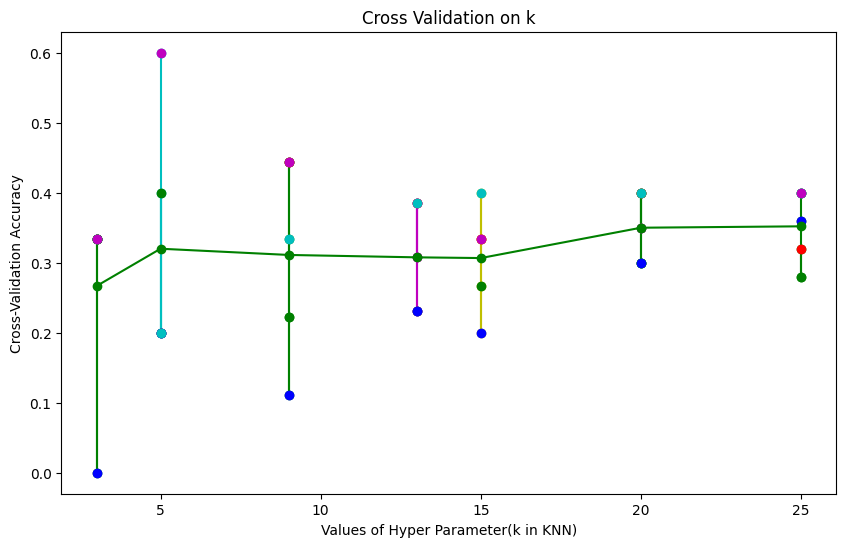

[3, 5, 9, 13, 15, 20, 25]


In [14]:
result_dict = {}
middle_point=[]

for item in points:
    result_dict.update(item)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,6))
plt.title("Cross Validation on k")
plt.ylabel("Cross-Validation Accuracy")
plt.xlabel("Values of Hyper Parameter(k in KNN)")
for idx2,(key,values) in  enumerate(result_dict.items()):
  avg=np.sum(values)/len(values)
  middle_point.append(avg)
  x_values = [key] * len(values)
  plt.plot(x_values, values, marker='o', color=random.choice(colors), linestyle='-')

  for idx,val in enumerate(values):
      plt.plot(key,val,marker='o',color=colors[idx],linestyle='-')

plt.plot(K_nei,middle_point,marker='o',color='g',linestyle='-')
plt.show()
print(K_nei)

Plotting values of points for L2 Distance



In [15]:
random.shuffle(trained_data)
K_nei=[3, 5, 9, 13, 15, 20,25]
points=[]
for i in K_nei:

  print("-"*10,f"for Neigbour={i}","-"*10)
  point=KFOLD(trained_data,kf=5,k_nei=i,L=2)
  points.append(point)
  print("-"*7)





---------- for Neigbour=3 ----------


100%|██████████| 600/600 [00:23<00:00, 25.35it/s]


--------------------
FOLD- 1
[np.float64(55161.0), 2, 2]
[np.float64(57327.0), 0, 2]
[np.float64(58125.0), 1, 2]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.65it/s]


--------------------
FOLD- 2
[np.float64(42569.0), 1, 2]
[np.float64(44548.0), 0, 2]
[np.float64(46600.0), 2, 2]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:24<00:00, 24.61it/s]


--------------------
FOLD- 3
[np.float64(57399.0), 1, 0]
[np.float64(59933.0), 2, 2]
[np.float64(60001.0), 1, 2]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.81it/s]


--------------------
FOLD- 4
[np.float64(58763.0), 1, 1]
[np.float64(59191.0), 1, 1]
[np.float64(59991.0), 1, 2]
Accuracy:  66.66666666666666 %
--------------------


100%|██████████| 600/600 [00:21<00:00, 27.38it/s]


--------------------
FOLD- 5
[np.float64(51929.0), 1, 1]
[np.float64(58374.0), 1, 2]
[np.float64(58582.0), 2, 1]
Accuracy:  33.33333333333333 %
--------------------
-------
---------- for Neigbour=5 ----------


100%|██████████| 600/600 [00:22<00:00, 26.50it/s]


--------------------
FOLD- 1
[np.float64(55161.0), 2, 2]
[np.float64(57327.0), 0, 2]
[np.float64(58125.0), 1, 2]
[np.float64(58706.0), 2, 1]
[np.float64(59253.0), 0, 2]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.34it/s]


--------------------
FOLD- 2
[np.float64(42569.0), 1, 2]
[np.float64(44548.0), 0, 2]
[np.float64(46600.0), 2, 2]
[np.float64(46672.0), 0, 2]
[np.float64(48476.0), 2, 1]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:25<00:00, 23.72it/s]


--------------------
FOLD- 3
[np.float64(57399.0), 1, 0]
[np.float64(59933.0), 2, 2]
[np.float64(60001.0), 1, 2]
[np.float64(60333.0), 2, 2]
[np.float64(61933.0), 2, 2]
Accuracy:  60.0 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.43it/s]


--------------------
FOLD- 4
[np.float64(58763.0), 1, 1]
[np.float64(59191.0), 1, 1]
[np.float64(59991.0), 1, 2]
[np.float64(61429.0), 1, 2]
[np.float64(62498.0), 1, 1]
Accuracy:  60.0 %
--------------------


100%|██████████| 600/600 [00:22<00:00, 26.81it/s]


--------------------
FOLD- 5
[np.float64(51929.0), 1, 1]
[np.float64(58374.0), 1, 2]
[np.float64(58582.0), 2, 1]
[np.float64(58822.0), 1, 1]
[np.float64(59031.0), 1, 1]
Accuracy:  60.0 %
--------------------
-------
---------- for Neigbour=9 ----------


100%|██████████| 600/600 [00:21<00:00, 27.31it/s]


--------------------
FOLD- 1
[np.float64(55161.0), 2, 2]
[np.float64(57327.0), 0, 2]
[np.float64(58125.0), 1, 2]
[np.float64(58706.0), 2, 1]
[np.float64(59253.0), 0, 2]
[np.float64(60075.0), 1, 1]
[np.float64(60266.0), 2, 1]
[np.float64(60345.0), 1, 2]
[np.float64(60490.0), 2, 2]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:22<00:00, 26.20it/s]


--------------------
FOLD- 2
[np.float64(42569.0), 1, 2]
[np.float64(44548.0), 0, 2]
[np.float64(46600.0), 2, 2]
[np.float64(46672.0), 0, 2]
[np.float64(48476.0), 2, 1]
[np.float64(52330.0), 2, 2]
[np.float64(55405.0), 1, 1]
[np.float64(55762.0), 1, 1]
[np.float64(55779.0), 0, 2]
Accuracy:  44.44444444444444 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.44it/s]


--------------------
FOLD- 3
[np.float64(57399.0), 1, 0]
[np.float64(59933.0), 2, 2]
[np.float64(60001.0), 1, 2]
[np.float64(60333.0), 2, 2]
[np.float64(61933.0), 2, 2]
[np.float64(62496.0), 2, 2]
[np.float64(62565.0), 1, 2]
[np.float64(62982.0), 1, 2]
[np.float64(63005.0), 2, 1]
Accuracy:  44.44444444444444 %
--------------------


100%|██████████| 600/600 [00:24<00:00, 24.72it/s]


--------------------
FOLD- 4
[np.float64(58763.0), 1, 1]
[np.float64(59191.0), 1, 1]
[np.float64(59991.0), 1, 2]
[np.float64(61429.0), 1, 2]
[np.float64(62498.0), 1, 1]
[np.float64(63654.0), 0, 2]
[np.float64(64405.0), 1, 1]
[np.float64(64889.0), 1, 2]
[np.float64(64973.0), 2, 2]
Accuracy:  55.55555555555556 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.45it/s]


--------------------
FOLD- 5
[np.float64(51929.0), 1, 1]
[np.float64(58374.0), 1, 2]
[np.float64(58582.0), 2, 1]
[np.float64(58822.0), 1, 1]
[np.float64(59031.0), 1, 1]
[np.float64(59036.0), 2, 2]
[np.float64(59695.0), 2, 1]
[np.float64(59746.0), 2, 1]
[np.float64(59820.0), 2, 2]
Accuracy:  55.55555555555556 %
--------------------
-------
---------- for Neigbour=13 ----------


100%|██████████| 600/600 [00:22<00:00, 26.84it/s]


--------------------
FOLD- 1
[np.float64(55161.0), 2, 2]
[np.float64(57327.0), 0, 2]
[np.float64(58125.0), 1, 2]
[np.float64(58706.0), 2, 1]
[np.float64(59253.0), 0, 2]
[np.float64(60075.0), 1, 1]
[np.float64(60266.0), 2, 1]
[np.float64(60345.0), 1, 2]
[np.float64(60490.0), 2, 2]
[np.float64(60931.0), 2, 1]
[np.float64(60976.0), 0, 1]
[np.float64(61041.0), 2, 1]
[np.float64(61344.0), 2, 1]
Accuracy:  23.076923076923077 %
--------------------


100%|██████████| 600/600 [00:22<00:00, 26.51it/s]


--------------------
FOLD- 2
[np.float64(42569.0), 1, 2]
[np.float64(44548.0), 0, 2]
[np.float64(46600.0), 2, 2]
[np.float64(46672.0), 0, 2]
[np.float64(48476.0), 2, 1]
[np.float64(52330.0), 2, 2]
[np.float64(55405.0), 1, 1]
[np.float64(55762.0), 1, 1]
[np.float64(55779.0), 0, 2]
[np.float64(57522.0), 1, 2]
[np.float64(57771.0), 1, 1]
[np.float64(58173.0), 0, 2]
[np.float64(58249.0), 1, 2]
Accuracy:  38.46153846153847 %
--------------------


100%|██████████| 600/600 [00:22<00:00, 27.07it/s]


--------------------
FOLD- 3
[np.float64(57399.0), 1, 0]
[np.float64(59933.0), 2, 2]
[np.float64(60001.0), 1, 2]
[np.float64(60333.0), 2, 2]
[np.float64(61933.0), 2, 2]
[np.float64(62496.0), 2, 2]
[np.float64(62565.0), 1, 2]
[np.float64(62982.0), 1, 2]
[np.float64(63005.0), 2, 1]
[np.float64(64032.0), 1, 2]
[np.float64(64101.0), 2, 1]
[np.float64(64148.0), 2, 2]
[np.float64(64386.0), 2, 1]
Accuracy:  38.46153846153847 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.86it/s]


--------------------
FOLD- 4
[np.float64(58763.0), 1, 1]
[np.float64(59191.0), 1, 1]
[np.float64(59991.0), 1, 2]
[np.float64(61429.0), 1, 2]
[np.float64(62498.0), 1, 1]
[np.float64(63654.0), 0, 2]
[np.float64(64405.0), 1, 1]
[np.float64(64889.0), 1, 2]
[np.float64(64973.0), 2, 2]
[np.float64(65404.0), 2, 2]
[np.float64(65464.0), 0, 1]
[np.float64(65701.0), 2, 1]
[np.float64(65789.0), 1, 1]
Accuracy:  53.84615384615385 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.27it/s]


--------------------
FOLD- 5
[np.float64(51929.0), 1, 1]
[np.float64(58374.0), 1, 2]
[np.float64(58582.0), 2, 1]
[np.float64(58822.0), 1, 1]
[np.float64(59031.0), 1, 1]
[np.float64(59036.0), 2, 2]
[np.float64(59695.0), 2, 1]
[np.float64(59746.0), 2, 1]
[np.float64(59820.0), 2, 2]
[np.float64(60002.0), 1, 1]
[np.float64(60324.0), 1, 2]
[np.float64(60856.0), 1, 1]
[np.float64(60968.0), 2, 2]
Accuracy:  61.53846153846154 %
--------------------
-------
---------- for Neigbour=15 ----------


100%|██████████| 600/600 [00:23<00:00, 25.57it/s]


--------------------
FOLD- 1
[np.float64(55161.0), 2, 2]
[np.float64(57327.0), 0, 2]
[np.float64(58125.0), 1, 2]
[np.float64(58706.0), 2, 1]
[np.float64(59253.0), 0, 2]
[np.float64(60075.0), 1, 1]
[np.float64(60266.0), 2, 1]
[np.float64(60345.0), 1, 2]
[np.float64(60490.0), 2, 2]
[np.float64(60931.0), 2, 1]
[np.float64(60976.0), 0, 1]
[np.float64(61041.0), 2, 1]
[np.float64(61344.0), 2, 1]
[np.float64(61725.0), 2, 1]
[np.float64(62049.0), 2, 1]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.56it/s]


--------------------
FOLD- 2
[np.float64(42569.0), 1, 2]
[np.float64(44548.0), 0, 2]
[np.float64(46600.0), 2, 2]
[np.float64(46672.0), 0, 2]
[np.float64(48476.0), 2, 1]
[np.float64(52330.0), 2, 2]
[np.float64(55405.0), 1, 1]
[np.float64(55762.0), 1, 1]
[np.float64(55779.0), 0, 2]
[np.float64(57522.0), 1, 2]
[np.float64(57771.0), 1, 1]
[np.float64(58173.0), 0, 2]
[np.float64(58249.0), 1, 2]
[np.float64(58490.0), 1, 2]
[np.float64(58718.0), 1, 2]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:22<00:00, 26.46it/s]


--------------------
FOLD- 3
[np.float64(57399.0), 1, 0]
[np.float64(59933.0), 2, 2]
[np.float64(60001.0), 1, 2]
[np.float64(60333.0), 2, 2]
[np.float64(61933.0), 2, 2]
[np.float64(62496.0), 2, 2]
[np.float64(62565.0), 1, 2]
[np.float64(62982.0), 1, 2]
[np.float64(63005.0), 2, 1]
[np.float64(64032.0), 1, 2]
[np.float64(64101.0), 2, 1]
[np.float64(64148.0), 2, 2]
[np.float64(64386.0), 2, 1]
[np.float64(64520.0), 2, 2]
[np.float64(64619.0), 2, 2]
Accuracy:  46.666666666666664 %
--------------------


100%|██████████| 600/600 [00:22<00:00, 26.90it/s]


--------------------
FOLD- 4
[np.float64(58763.0), 1, 1]
[np.float64(59191.0), 1, 1]
[np.float64(59991.0), 1, 2]
[np.float64(61429.0), 1, 2]
[np.float64(62498.0), 1, 1]
[np.float64(63654.0), 0, 2]
[np.float64(64405.0), 1, 1]
[np.float64(64889.0), 1, 2]
[np.float64(64973.0), 2, 2]
[np.float64(65404.0), 2, 2]
[np.float64(65464.0), 0, 1]
[np.float64(65701.0), 2, 1]
[np.float64(65789.0), 1, 1]
[np.float64(66033.0), 2, 1]
[np.float64(66125.0), 2, 2]
Accuracy:  53.333333333333336 %
--------------------


100%|██████████| 600/600 [00:24<00:00, 24.29it/s]


--------------------
FOLD- 5
[np.float64(51929.0), 1, 1]
[np.float64(58374.0), 1, 2]
[np.float64(58582.0), 2, 1]
[np.float64(58822.0), 1, 1]
[np.float64(59031.0), 1, 1]
[np.float64(59036.0), 2, 2]
[np.float64(59695.0), 2, 1]
[np.float64(59746.0), 2, 1]
[np.float64(59820.0), 2, 2]
[np.float64(60002.0), 1, 1]
[np.float64(60324.0), 1, 2]
[np.float64(60856.0), 1, 1]
[np.float64(60968.0), 2, 2]
[np.float64(61041.0), 1, 2]
[np.float64(61175.0), 1, 1]
Accuracy:  60.0 %
--------------------
-------
---------- for Neigbour=20 ----------


100%|██████████| 600/600 [00:23<00:00, 25.16it/s]


--------------------
FOLD- 1
[np.float64(55161.0), 2, 2]
[np.float64(57327.0), 0, 2]
[np.float64(58125.0), 1, 2]
[np.float64(58706.0), 2, 1]
[np.float64(59253.0), 0, 2]
[np.float64(60075.0), 1, 1]
[np.float64(60266.0), 2, 1]
[np.float64(60345.0), 1, 2]
[np.float64(60490.0), 2, 2]
[np.float64(60931.0), 2, 1]
[np.float64(60976.0), 0, 1]
[np.float64(61041.0), 2, 1]
[np.float64(61344.0), 2, 1]
[np.float64(61725.0), 2, 1]
[np.float64(62049.0), 2, 1]
[np.float64(62088.0), 2, 2]
[np.float64(62124.0), 0, 1]
[np.float64(62340.0), 2, 1]
[np.float64(62384.0), 0, 2]
[np.float64(62481.0), 1, 1]
Accuracy:  25.0 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.31it/s]


--------------------
FOLD- 2
[np.float64(42569.0), 1, 2]
[np.float64(44548.0), 0, 2]
[np.float64(46600.0), 2, 2]
[np.float64(46672.0), 0, 2]
[np.float64(48476.0), 2, 1]
[np.float64(52330.0), 2, 2]
[np.float64(55405.0), 1, 1]
[np.float64(55762.0), 1, 1]
[np.float64(55779.0), 0, 2]
[np.float64(57522.0), 1, 2]
[np.float64(57771.0), 1, 1]
[np.float64(58173.0), 0, 2]
[np.float64(58249.0), 1, 2]
[np.float64(58490.0), 1, 2]
[np.float64(58718.0), 1, 2]
[np.float64(58913.0), 2, 1]
[np.float64(58950.0), 2, 2]
[np.float64(58966.0), 1, 2]
[np.float64(59133.0), 2, 2]
[np.float64(59245.0), 0, 2]
Accuracy:  35.0 %
--------------------


100%|██████████| 600/600 [00:24<00:00, 24.42it/s]


--------------------
FOLD- 3
[np.float64(57399.0), 1, 0]
[np.float64(59933.0), 2, 2]
[np.float64(60001.0), 1, 2]
[np.float64(60333.0), 2, 2]
[np.float64(61933.0), 2, 2]
[np.float64(62496.0), 2, 2]
[np.float64(62565.0), 1, 2]
[np.float64(62982.0), 1, 2]
[np.float64(63005.0), 2, 1]
[np.float64(64032.0), 1, 2]
[np.float64(64101.0), 2, 1]
[np.float64(64148.0), 2, 2]
[np.float64(64386.0), 2, 1]
[np.float64(64520.0), 2, 2]
[np.float64(64619.0), 2, 2]
[np.float64(64656.0), 1, 2]
[np.float64(64663.0), 2, 2]
[np.float64(64700.0), 2, 1]
[np.float64(64835.0), 1, 1]
[np.float64(65247.0), 2, 2]
Accuracy:  50.0 %
--------------------


100%|██████████| 600/600 [00:22<00:00, 26.30it/s]


--------------------
FOLD- 4
[np.float64(58763.0), 1, 1]
[np.float64(59191.0), 1, 1]
[np.float64(59991.0), 1, 2]
[np.float64(61429.0), 1, 2]
[np.float64(62498.0), 1, 1]
[np.float64(63654.0), 0, 2]
[np.float64(64405.0), 1, 1]
[np.float64(64889.0), 1, 2]
[np.float64(64973.0), 2, 2]
[np.float64(65404.0), 2, 2]
[np.float64(65464.0), 0, 1]
[np.float64(65701.0), 2, 1]
[np.float64(65789.0), 1, 1]
[np.float64(66033.0), 2, 1]
[np.float64(66125.0), 2, 2]
[np.float64(66395.0), 1, 2]
[np.float64(66434.0), 2, 2]
[np.float64(66677.0), 2, 2]
[np.float64(66946.0), 2, 1]
[np.float64(67119.0), 1, 1]
Accuracy:  55.00000000000001 %
--------------------


100%|██████████| 600/600 [00:21<00:00, 27.39it/s]


--------------------
FOLD- 5
[np.float64(51929.0), 1, 1]
[np.float64(58374.0), 1, 2]
[np.float64(58582.0), 2, 1]
[np.float64(58822.0), 1, 1]
[np.float64(59031.0), 1, 1]
[np.float64(59036.0), 2, 2]
[np.float64(59695.0), 2, 1]
[np.float64(59746.0), 2, 1]
[np.float64(59820.0), 2, 2]
[np.float64(60002.0), 1, 1]
[np.float64(60324.0), 1, 2]
[np.float64(60856.0), 1, 1]
[np.float64(60968.0), 2, 2]
[np.float64(61041.0), 1, 2]
[np.float64(61175.0), 1, 1]
[np.float64(61543.0), 2, 1]
[np.float64(61674.0), 1, 2]
[np.float64(61732.0), 2, 2]
[np.float64(61844.0), 1, 2]
[np.float64(62058.0), 2, 2]
Accuracy:  55.00000000000001 %
--------------------
-------
---------- for Neigbour=25 ----------


100%|██████████| 600/600 [00:22<00:00, 26.33it/s]


--------------------
FOLD- 1
[np.float64(55161.0), 2, 2]
[np.float64(57327.0), 0, 2]
[np.float64(58125.0), 1, 2]
[np.float64(58706.0), 2, 1]
[np.float64(59253.0), 0, 2]
[np.float64(60075.0), 1, 1]
[np.float64(60266.0), 2, 1]
[np.float64(60345.0), 1, 2]
[np.float64(60490.0), 2, 2]
[np.float64(60931.0), 2, 1]
[np.float64(60976.0), 0, 1]
[np.float64(61041.0), 2, 1]
[np.float64(61344.0), 2, 1]
[np.float64(61725.0), 2, 1]
[np.float64(62049.0), 2, 1]
[np.float64(62088.0), 2, 2]
[np.float64(62124.0), 0, 1]
[np.float64(62340.0), 2, 1]
[np.float64(62384.0), 0, 2]
[np.float64(62481.0), 1, 1]
[np.float64(62518.0), 1, 2]
[np.float64(63144.0), 2, 2]
[np.float64(63295.0), 2, 0]
[np.float64(63403.0), 2, 1]
[np.float64(63638.0), 1, 1]
Accuracy:  28.000000000000004 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.06it/s]


--------------------
FOLD- 2
[np.float64(42569.0), 1, 2]
[np.float64(44548.0), 0, 2]
[np.float64(46600.0), 2, 2]
[np.float64(46672.0), 0, 2]
[np.float64(48476.0), 2, 1]
[np.float64(52330.0), 2, 2]
[np.float64(55405.0), 1, 1]
[np.float64(55762.0), 1, 1]
[np.float64(55779.0), 0, 2]
[np.float64(57522.0), 1, 2]
[np.float64(57771.0), 1, 1]
[np.float64(58173.0), 0, 2]
[np.float64(58249.0), 1, 2]
[np.float64(58490.0), 1, 2]
[np.float64(58718.0), 1, 2]
[np.float64(58913.0), 2, 1]
[np.float64(58950.0), 2, 2]
[np.float64(58966.0), 1, 2]
[np.float64(59133.0), 2, 2]
[np.float64(59245.0), 0, 2]
[np.float64(59424.0), 1, 1]
[np.float64(59618.0), 1, 2]
[np.float64(59971.0), 2, 2]
[np.float64(60296.0), 0, 2]
[np.float64(60404.0), 1, 2]
Accuracy:  36.0 %
--------------------


100%|██████████| 600/600 [00:24<00:00, 24.90it/s]


--------------------
FOLD- 3
[np.float64(57399.0), 1, 0]
[np.float64(59933.0), 2, 2]
[np.float64(60001.0), 1, 2]
[np.float64(60333.0), 2, 2]
[np.float64(61933.0), 2, 2]
[np.float64(62496.0), 2, 2]
[np.float64(62565.0), 1, 2]
[np.float64(62982.0), 1, 2]
[np.float64(63005.0), 2, 1]
[np.float64(64032.0), 1, 2]
[np.float64(64101.0), 2, 1]
[np.float64(64148.0), 2, 2]
[np.float64(64386.0), 2, 1]
[np.float64(64520.0), 2, 2]
[np.float64(64619.0), 2, 2]
[np.float64(64656.0), 1, 2]
[np.float64(64663.0), 2, 2]
[np.float64(64700.0), 2, 1]
[np.float64(64835.0), 1, 1]
[np.float64(65247.0), 2, 2]
[np.float64(65495.0), 2, 2]
[np.float64(65838.0), 2, 0]
[np.float64(65960.0), 1, 2]
[np.float64(66226.0), 1, 2]
[np.float64(66483.0), 1, 2]
Accuracy:  44.0 %
--------------------


100%|██████████| 600/600 [00:25<00:00, 23.32it/s]


--------------------
FOLD- 4
[np.float64(58763.0), 1, 1]
[np.float64(59191.0), 1, 1]
[np.float64(59991.0), 1, 2]
[np.float64(61429.0), 1, 2]
[np.float64(62498.0), 1, 1]
[np.float64(63654.0), 0, 2]
[np.float64(64405.0), 1, 1]
[np.float64(64889.0), 1, 2]
[np.float64(64973.0), 2, 2]
[np.float64(65404.0), 2, 2]
[np.float64(65464.0), 0, 1]
[np.float64(65701.0), 2, 1]
[np.float64(65789.0), 1, 1]
[np.float64(66033.0), 2, 1]
[np.float64(66125.0), 2, 2]
[np.float64(66395.0), 1, 2]
[np.float64(66434.0), 2, 2]
[np.float64(66677.0), 2, 2]
[np.float64(66946.0), 2, 1]
[np.float64(67119.0), 1, 1]
[np.float64(67345.0), 2, 1]
[np.float64(67460.0), 1, 1]
[np.float64(67559.0), 2, 2]
[np.float64(67580.0), 1, 1]
[np.float64(67773.0), 1, 2]
Accuracy:  56.00000000000001 %
--------------------


100%|██████████| 600/600 [00:23<00:00, 25.05it/s]


--------------------
FOLD- 5
[np.float64(51929.0), 1, 1]
[np.float64(58374.0), 1, 2]
[np.float64(58582.0), 2, 1]
[np.float64(58822.0), 1, 1]
[np.float64(59031.0), 1, 1]
[np.float64(59036.0), 2, 2]
[np.float64(59695.0), 2, 1]
[np.float64(59746.0), 2, 1]
[np.float64(59820.0), 2, 2]
[np.float64(60002.0), 1, 1]
[np.float64(60324.0), 1, 2]
[np.float64(60856.0), 1, 1]
[np.float64(60968.0), 2, 2]
[np.float64(61041.0), 1, 2]
[np.float64(61175.0), 1, 1]
[np.float64(61543.0), 2, 1]
[np.float64(61674.0), 1, 2]
[np.float64(61732.0), 2, 2]
[np.float64(61844.0), 1, 2]
[np.float64(62058.0), 2, 2]
[np.float64(62239.0), 1, 1]
[np.float64(62306.0), 1, 1]
[np.float64(62763.0), 2, 1]
[np.float64(62812.0), 0, 1]
[np.float64(63139.0), 1, 1]
Accuracy:  56.00000000000001 %
--------------------
-------


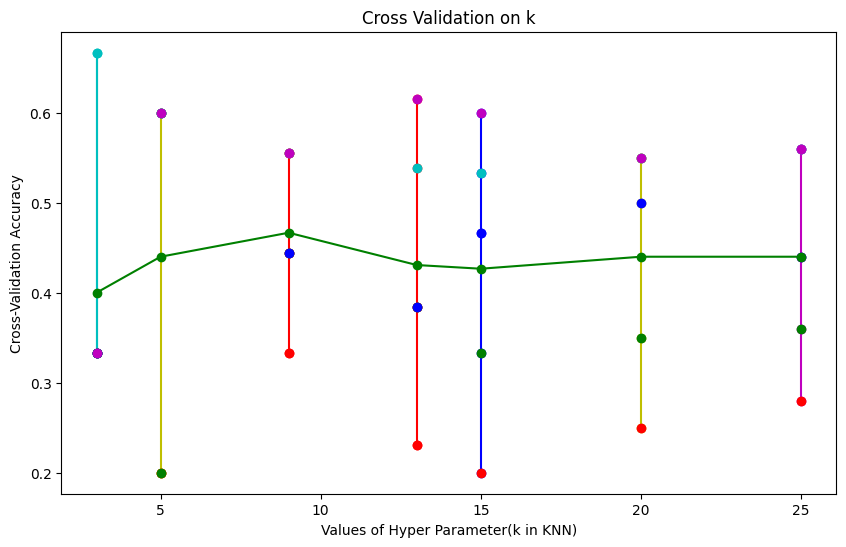

[3, 5, 9, 13, 15, 20, 25]


In [16]:
result_dict2 = {}
middle_point2=[]

for item in points:
    result_dict2.update(item)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,6))
plt.title("Cross Validation on k")
plt.ylabel("Cross-Validation Accuracy")
plt.xlabel("Values of Hyper Parameter(k in KNN)")
for idx2,(key,values) in  enumerate(result_dict2.items()):
  avg=np.sum(values)/len(values)
  middle_point2.append(avg)
  x_values = [key] * len(values)
  plt.plot(x_values, values, marker='o', color=random.choice(colors), linestyle='-')

  for idx,val in enumerate(values):
      plt.plot(key,val,marker='o',color=colors[idx],linestyle='-')

plt.plot(K_nei,middle_point2,marker='o',color='g',linestyle='-')
plt.show()
print(K_nei)

In [17]:
print(middle_point2)
print("Average Accuracy for L2:",np.sum(middle_point2)/len(middle_point2))
print(middle_point2)
print("Average Accuracy for L1:",np.sum(middle_point)/len(middle_point))


[np.float64(0.39999999999999997), np.float64(0.44000000000000006), np.float64(0.4666666666666666), np.float64(0.43076923076923074), np.float64(0.42666666666666664), np.float64(0.44000000000000006), np.float64(0.44000000000000006)]
Average Accuracy for L2: 0.43487179487179484
[np.float64(0.39999999999999997), np.float64(0.44000000000000006), np.float64(0.4666666666666666), np.float64(0.43076923076923074), np.float64(0.42666666666666664), np.float64(0.44000000000000006), np.float64(0.44000000000000006)]
Average Accuracy for L1: 0.31630525030525025


In [25]:
TEST_DIR="/content/drive/MyDrive/input/animal-image-datasetdog-cat-and-panda/images"
catag2=load_image(TEST_DIR)
test2=get_trained_data(catag2,TEST_DIR)
random.shuffle(test2)



100%|██████████| 1/1 [00:00<00:00, 88.99it/s]


In [26]:
random.shuffle(test2)
def top5pred(test,trained,L=1,catag=catag2):
  right=0
  pred=KNN(test,trained,L=1)
  for p in pred:
    show_image(p[3],catag[p[1]])
    if p[2] ==p[1]:
      right+=1
  accuracy=right/len(test)
  print('-'*3,f'Accuracy:{accuracy*100} %')





100%|██████████| 3/3 [00:00<00:00, 32.54it/s]


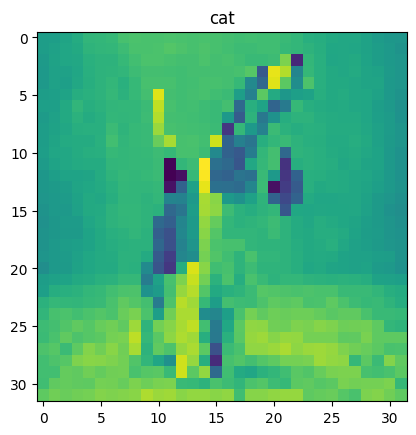

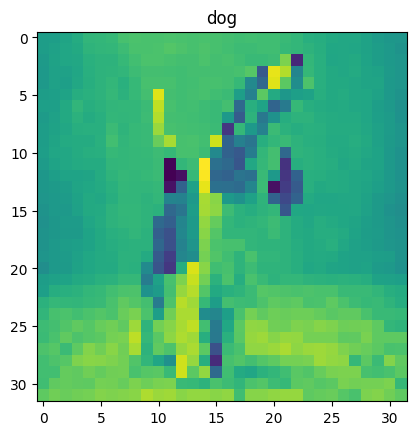

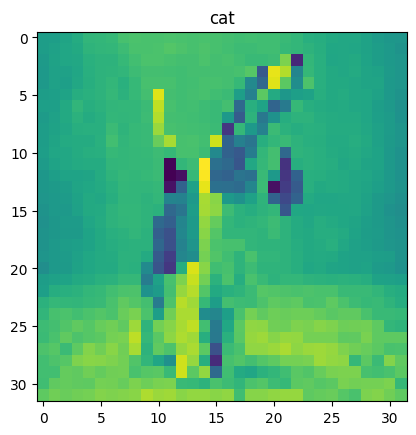

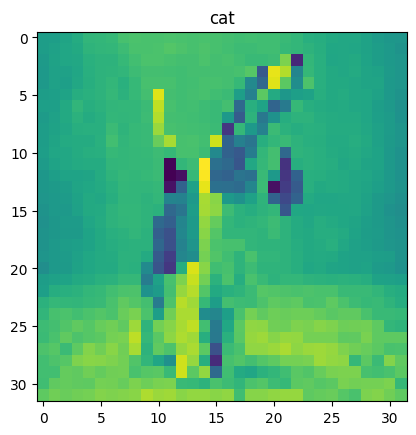

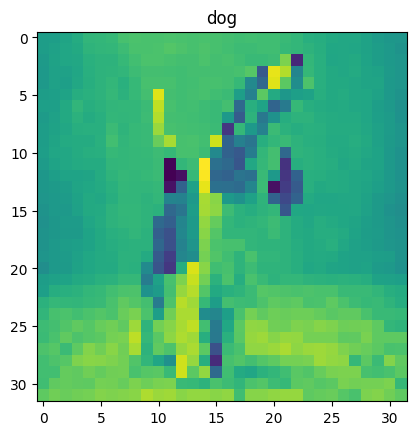

--- Accuracy:66.66666666666666 %


In [31]:
top5pred(test2,trained_data,1)

# **Which one is Better between Manhattan (L1) and Euclidean (L2) Distances ?**
As the images are represented as vectors in a high-dimensional space, Euclidean distance is often preferred because it captures the overall similarity between the vectors.
 Manhattan distance might perform better in cases where the image features are sparse or want to reduce the impact of outliers.

 For this particular dataset,

 ** L2 distance performs better than L1 distance.**









**Limitations:**
Rotation, Scaling, and Translation: Image classification models can struggle with variations in object orientation, size, and position, leading to misclassification.
Lighting and Color Variations: Changes in lighting, shadows, and color can significantly affect the model's performance, as it may not recognize the same object under different conditions.

# **Improvements:**
**Data Augmentation:**

Apply transformations like rotation, flipping, and scaling to increase the diversity of training data, helping the model generalize better to real-world variations.

**Transfer Learning:**
Use pre-trained models on large datasets and fine-tune them on the specific target dataset to improve performance, especially with limited data.

**Regularization Techniques:**
Implement dropout, L1/L2 regularization, and early stopping to prevent overfitting and enhance the model's generalization capabilities.

**Class Imbalance Handling:**
Address class imbalance by oversampling minority classes, undersampling majority classes, or using class-weighted loss functions to improve accuracy across all classes.

**Incorporate Attention Mechanisms:**
Integrate attention mechanisms to help the model focus on the most relevant parts of the image, leading to more accurate classifications.